<a href="https://colab.research.google.com/github/Kriti-10/Google-Collaboratory-Files/blob/main/Flower_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 224M/225M [00:07<00:00, 39.0MB/s]
100% 225M/225M [00:07<00:00, 33.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flowers-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
!pip install split-folders
import splitfolders
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
splitfolders.ratio('/content/flowers/',output='/content/data',ratio=(0.7,0.0,0.3))

Copying files: 4317 files [00:00, 5042.07 files/s]


In [ ]:
import shutil
shutil.rmtree('/content/data/val', ignore_errors=False, onerror=None)

(333, 500, 3)

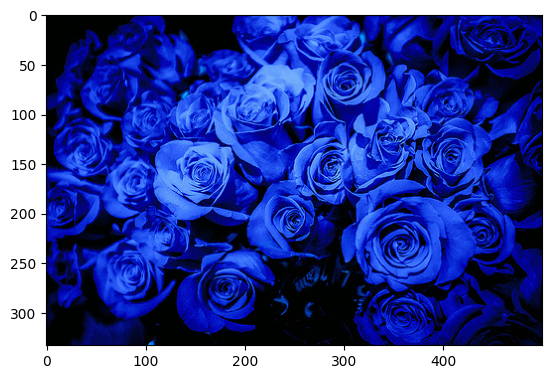

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_img=cv2.imread('/content/data/test/rose/10503217854_e66a804309.jpg')
plt.imshow(test_img)
test_img.shape

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/train',
    seed = 123,
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/test',
    seed = 123,
    batch_size=32,
    image_size=(256,256)
)


Found 3019 files belonging to 5 classes.
Found 1298 files belonging to 5 classes.


In [ ]:
# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)
class_name = train_ds.class_names
print(class_name)


for image_batch, labels_batch in train_ds:
  image = image_batch.numpy()
  label = labels_batch.numpy()
# print(image)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_name[labels[i]])
#     plt.axis("off")

normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
95/95 [==============================] - 26s 133ms/step - loss: 7.3911 - accuracy: 0.3670 - val_loss: 5.1580 - val_accuracy: 0.2589
Epoch 2/10
95/95 [==============================] - 13s 128ms/step - loss: 2.9542 - accuracy: 0.3875 - val_loss: 2.6396 - val_accuracy: 0.3035
Epoch 3/10
95/95 [==============================] - 12s 120ms/step - loss: 1.9027 - accuracy: 0.4233 - val_loss: 2.0432 - val_accuracy: 0.4199
Epoch 4/10
95/95 [==============================] - 13s 130ms/step - loss: 1.5679 - accuracy: 0.4376 - val_loss: 1.6820 - val_accuracy: 0.3952
Epoch 5/10
95/95 [==============================] - 12s 122ms/step - loss: 1.3822 - accuracy: 0.4776 - val_loss: 1.2431 - val_accuracy: 0.5277
Epoch 6/10
95/95 [==============================] - 12s 122ms/step - loss: 1.2113 - accuracy: 0.5104 - val_loss: 1.1858 - val_accuracy: 0.4992
Epoch 7/10
95/95 [==============================] - 12s 121ms/step - loss: 1.0625 - accuracy: 0.5730 - val_loss: 1.2114 - val_accuracy: 0.5308

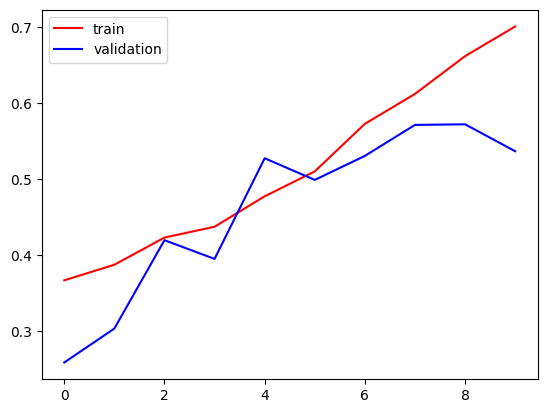

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

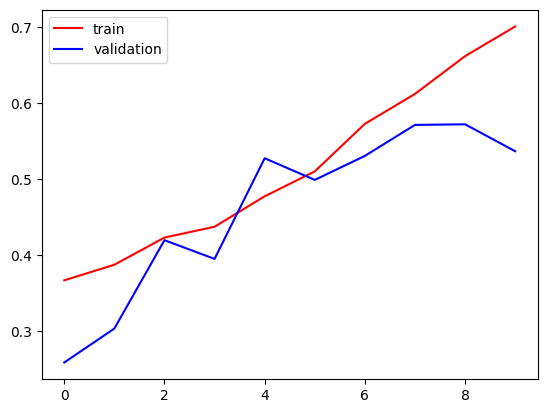

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
my_img=cv2.imread('/content/daisy.jpeg')

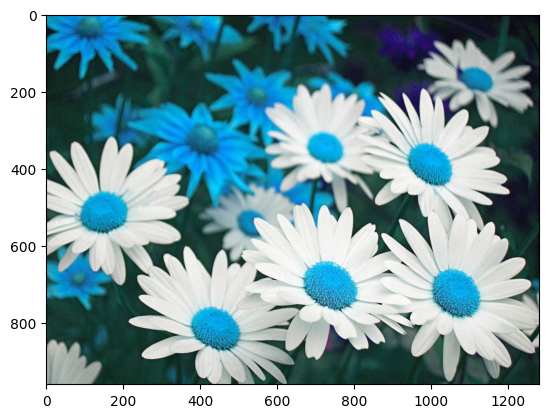

In [ ]:
plt.imshow(my_img)

In [ ]:
my_img.shape

(960, 1280, 3)

In [ ]:
my_img=cv2.resize(my_img,(256,256))
test_input= my_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[9.4622356e-01, 5.1895149e-02, 1.1292022e-03, 2.3759387e-05,
        7.2828843e-04]], dtype=float32)